# Assignment- Data Project from 23andMe

Please answer the questions below based on the data provided:

1. Plot daily sales for all 50 weeks.<br>
2. It looks like there has been a sudden change in daily sales. What date did it occur?<br>
3. Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?<br>
4. Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).<br>
5. Assume a given day is divided into four dayparts: night (12:00AM - 6:00AM), morning (6:00AM - 12:00PM), afternoon (12:00PM - 6:00PM), and evening (6:00PM - 12:00AM). What is the percentage of sales in each daypart over all 50 weeks?<br>

## Importing and merging the CSV Files


In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import datetime as dt
from scipy import stats

In [2]:
# Merging the individual files to one csv file and converting to dataframe
files = os.path.join("C:/Users/Gautam/Desktop/jnotebook/Projects/Stratascratch_sales_23AndMe/datasets/", "*.csv")
files = glob.glob(files)

df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

                  sale_time purchaser_gender
0       2012-10-01 01:42:22           female
1       2012-10-01 02:24:53           female
2       2012-10-01 02:25:40           female
3       2012-10-01 02:30:42           female
4       2012-10-01 02:51:32             male
...                     ...              ...
817311  2013-09-15 23:30:51           female
817312  2013-09-15 23:42:02           female
817313  2013-09-15 23:43:24             male
817314  2013-09-15 23:43:32             male
817315  2013-09-15 23:48:47             male

[817316 rows x 2 columns]


In [3]:
# Exporing the merged file
df.to_csv('merged.csv', index=False)

In [4]:
# Checking the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817316 entries, 0 to 817315
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sale_time         817316 non-null  object
 1   purchaser_gender  817316 non-null  object
dtypes: object(2)
memory usage: 12.5+ MB


## Question 1

__Plot daily sales for all 50 weeks.__

In [5]:
# Creating the date, hour and month-year column
df["date"]= pd.to_datetime(df['sale_time']).dt.floor('d')
df['hour']  = pd.to_datetime(df['sale_time']).dt.ceil('h').dt.hour
df['month_year'] = pd.to_datetime(df['date']).dt.strftime('%b %Y')
df.head()

,sale_time,purchaser_gender,date,hour,month_year
0,2012-10-01 01:42:22,female,2012-10-01,2,Oct 2012
1,2012-10-01 02:24:53,female,2012-10-01,3,Oct 2012
2,2012-10-01 02:25:40,female,2012-10-01,3,Oct 2012
3,2012-10-01 02:30:42,female,2012-10-01,3,Oct 2012
4,2012-10-01 02:51:32,male,2012-10-01,3,Oct 2012


          date  count
0   2012-10-01   2056
1   2012-10-02   1928
2   2012-10-03   1996
3   2012-10-04   2184
4   2012-10-05   1904
..         ...    ...
345 2013-09-11   2876
346 2013-09-12   2940
347 2013-09-13   2972
348 2013-09-14   2620
349 2013-09-15   3008

[350 rows x 2 columns]


<AxesSubplot:title={'center':'Daily sales over 50 weeks'}, xlabel='date', ylabel='count'>

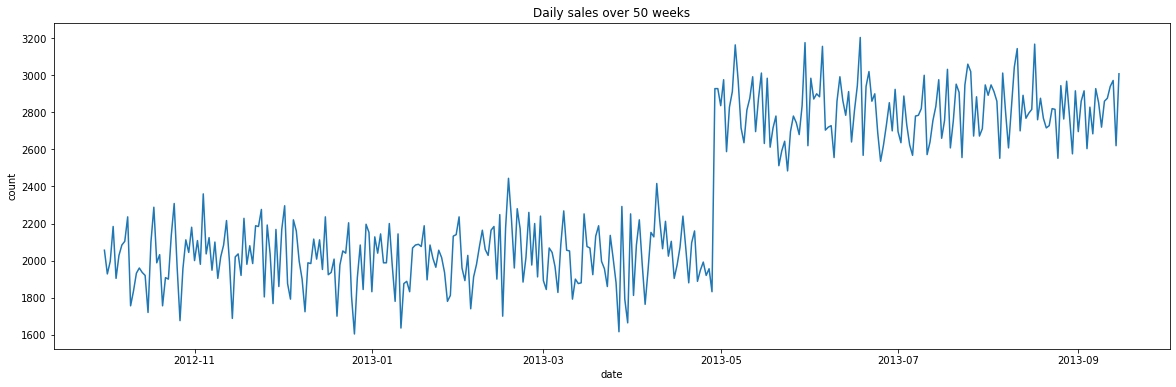

In [12]:
# Grouping the data to determine the sales over each date and plotting the same
df_grouped_daily_sales= df.groupby("date").size().to_frame("count").reset_index()
print(df_grouped_daily_sales)

plt.figure(figsize=(20,6))
plt.title("Daily sales over 50 weeks")
df_grouped_daily_sales.plot(x= "date", y )

We can observe a huge increase in the sales on a particular date.

## Question 2

__It looks like there has been a sudden change in daily sales. What date did it occur?__

In [13]:
# Determining the difference between the sale amount of a date and the previous date
df_grouped_daily_sales['shifted_count'] = df_grouped_daily_sales['count'].shift(1)
df_grouped_daily_sales['difference_btw_prev_day'] = df_grouped_daily_sales['count'] - df_grouped_daily_sales['shifted_count']
df_grouped_daily_sales.head()

,date,count,shifted_count,difference_btw_prev_day
0,2012-10-01,2056,NaN,NaN
1,2012-10-02,1928,2056.0,-128.0
2,2012-10-03,1996,1928.0,68.0
3,2012-10-04,2184,1996.0,188.0
4,2012-10-05,1904,2184.0,-280.0


In [14]:
# Finding the date with the maximum difference in the sale amount
max_row_index = df_grouped_daily_sales['difference_btw_prev_day'].idxmax()
max_row = df_grouped_daily_sales.loc[max_row_index]
print(max_row)


date                       2013-04-29 00:00:00
count                                     2928
shifted_count                           1832.0
difference_btw_prev_day                 1096.0
Name: 210, dtype: object


The sudden increase in sales happened on 29th April 2013.

## Question 3

__Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?__

In [17]:
# Performing a t-test and obtaining the p-value
df_grouped_daily_sales.dropna(inplace=True)
stats.ttest_1samp(df_grouped_daily_sales['count'], 2928)

Ttest_1sampResult(statistic=-26.273266340051002, pvalue=1.3019593251472396e-84)

The obtained p-value from the t-test is extremely low (p = 1.30e-84), which is significantly smaller than the commonly used significance level of 0.05. This indicates that the observed change in daily sales on the selected date is highly statistically significant. Therefore, we can conclude that this particular date holds great importance for our analysis.

## Question 4

__Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).__

In [18]:
# Creating a grouped dataframe with gender
df_grouped_gender = df.groupby(['date', 'purchaser_gender']).size().reset_index(name='sales_amount')
df_grouped_gender

,date,purchaser_gender,sales_amount
0,2012-10-01,female,1652
1,2012-10-01,male,404
2,2012-10-02,female,1516
3,2012-10-02,male,412
4,2012-10-03,female,1544
...,...,...,...
695,2013-09-13,male,2148
696,2013-09-14,female,772
697,2013-09-14,male,1848
698,2013-09-15,female,920


In [19]:
# Creating separate columns for male and female sales amount
df_male_female = pd.DataFrame(df_grouped_gender['date'].unique(),columns=['date'])
df_male_female['female_sales_amount'] = pd.Series(df_grouped_gender[df_grouped_gender.purchaser_gender == 'female']['sales_amount']).reset_index(drop=True)
df_male_female['male_sales_amount'] = pd.Series(df_grouped_gender[df_grouped_gender.purchaser_gender == 'male']['sales_amount']).reset_index(drop=True)
df_male_female.head()


,date,female_sales_amount,male_sales_amount
0,2012-10-01,1652,404
1,2012-10-02,1516,412
2,2012-10-03,1544,452
3,2012-10-04,1728,456
4,2012-10-05,1472,432


          date  female_sales_amount  male_sales_amount  gender_ratio  \
0   2012-10-01                 1652                404      0.244552   
1   2012-10-02                 1516                412      0.271768   
2   2012-10-03                 1544                452      0.292746   
3   2012-10-04                 1728                456      0.263889   
4   2012-10-05                 1472                432      0.293478   
..         ...                  ...                ...           ...   
345 2013-09-11                  896               1980      2.209821   
346 2013-09-12                  900               2040      2.266667   
347 2013-09-13                  824               2148      2.606796   
348 2013-09-14                  772               1848      2.393782   
349 2013-09-15                  920               2088      2.269565   

     total_sales_amount  
0                  2056  
1                  1928  
2                  1996  
3                  2184  
4    

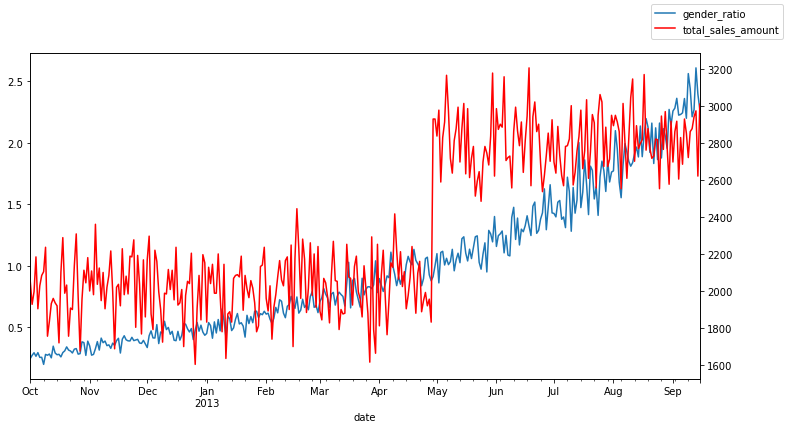

In [45]:
# Creating the sales ratio column and the total sales column between the male and female sales amount
df_male_female['gender_ratio'] = df_male_female['male_sales_amount']/df_male_female['female_sales_amount']
df_male_female['total_sales_amount']  = df_male_female['male_sales_amount'] + df_male_female['female_sales_amount']
print(df_male_female)

ax = df_male_female.plot(x="date", y="gender_ratio", legend=False, figsize=(12, 6))
ax2 = ax.twinx()
df_male_female.plot(x="date", y="total_sales_amount", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

We can observe that the spike in sales is not due to a shift in the proportion of male-vs-female customers but something else. 

## Question 5

__Assume a given day is divided into four dayparts: night (12:00AM - 6:00AM), morning (6:00AM to 12:00PM), afternoon (12:00PM to 6:00PM) and evening (6:00PM - 12:00AM). What is the percentage of sales in each daypart over all 50 weeks?__

In [28]:
# Defining a function to create day parts based on the hour
def assign_day_part(sale_hour):
    if sale_hour >= 6 and sale_hour < 12:
        return 'morning'
    if sale_hour >= 12 and sale_hour < 18:
        return 'afternoon'
    if sale_hour >= 18 and sale_hour < 24:
        return 'evening'
    if sale_hour >= 0 and sale_hour < 6:
        return 'night'

In [31]:
# Applying the function to create the column of day part
df['day_part'] = df['hour'].apply(assign_day_part)
df.head()

,sale_time,purchaser_gender,date,hour,month_year,day_part
0,2012-10-01 01:42:22,female,2012-10-01,2,Oct 2012,night
1,2012-10-01 02:24:53,female,2012-10-01,3,Oct 2012,night
2,2012-10-01 02:25:40,female,2012-10-01,3,Oct 2012,night
3,2012-10-01 02:30:42,female,2012-10-01,3,Oct 2012,night
4,2012-10-01 02:51:32,male,2012-10-01,3,Oct 2012,night


In [35]:
# Creating the grouped dataframe with the day part, sales amount and the percent sales.
df_grouped_hour= df.groupby("day_part").size().to_frame("sale_amount").reset_index()
df_grouped_hour["percent_sales"]=(df_grouped_hour["sale_amount"]/df_grouped_hour["sale_amount"].sum())*100
df_grouped_hour

,day_part,sale_amount,percent_sales
0,afternoon,324636,39.719766
1,evening,214092,26.194520
2,morning,224320,27.445933
3,night,54268,6.639782


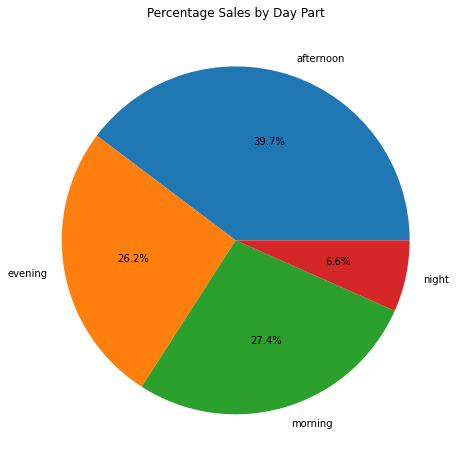

In [42]:
# Creating a pie chart to show the Percentage Sales by each Day Part
plt.figure(figsize=(8, 8))
plt.pie(df_grouped_hour['sale_amount'], labels=df_grouped_hour['day_part'], autopct='%1.1f%%')
plt.title('Percentage Sales by Day Part')
plt.show()

As we can observe, most sales i.e. `39.7 %` occured in the afternoon followed by moring and evening with `27.4 %` and `26.2 %` respectively. The night records the minimum number of sales with `6.6 %`.